# Add Folders to Path

In [3]:
%%time
import sys, os
# get current directory
path = os.getcwd()
# get parent directory
parent_directory = os.path.sep.join(path.split(os.path.sep)[:-2])
# add Algorithm folder to current working path in order to access the functions inside the folder ´Algorithms´
sys.path.append(parent_directory+"/General_Functions")

Wall time: 0 ns


# Agulhas

## Import Data

In [11]:
%%time
import scipy.io as sio

#Import velocity data from file in data-folder
mat_file = sio.loadmat('../../Data/TensorFieldData.mat')

x = mat_file['x1_g']
y = mat_file['x2_g']
C11 = mat_file['C11']
C12 = mat_file['C12']
C22 = mat_file['C22']
lam2 = mat_file['lam2']
C11_x = mat_file['C11x1']
C11_y = mat_file['C11x2']
C12_x = mat_file['C12x1']
C12_y = mat_file['C12x2']
C22_x = mat_file['C22x1']
C22_y = mat_file['C22x2']

X_domain, Y_domain = np.meshgrid(x, y)

(801, 351)
(801, 351)
Wall time: 102 ms


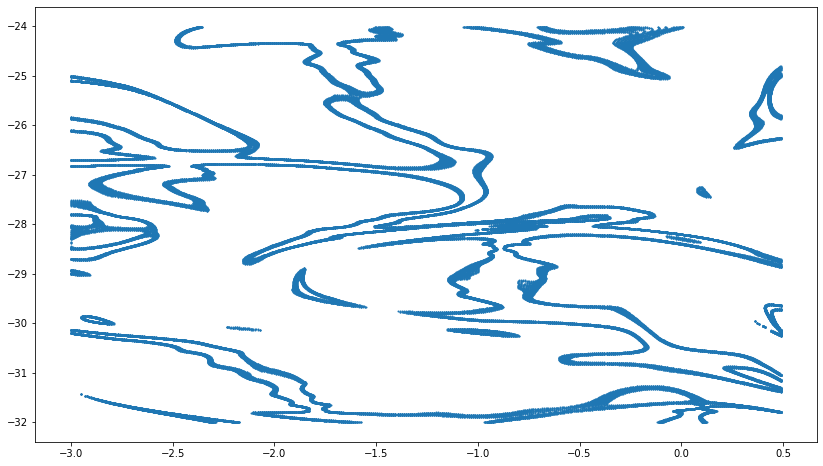

Wall time: 2.14 s


In [19]:
%%time
import numpy as np
#from ipynb.fs.defs.geodesic_elliptic_LCS import _geodesic_elliptic_LCS
from ipynb.fs.defs.init_level_set import _init_level_set
from ipynb.fs.defs.gradient_C import _gradient_C

lambda_range = np.arange(0.9, 1.1+0.02, 0.02)

#grad_C11, grad_C12, grad_C22 = _gradient_C(X_domain, Y_domain, C)
x0lam, y0lam, phi0lam = _init_level_set(X_domain, Y_domain, C11, C12, lambda_range)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14, 8))
ax = plt.axes()
ax.scatter(x0lam, y0lam, s = 1)
plt.show()

#x0lam, y0lam, phi0lam = _geodesic_elliptic_LCS(X_domain, Y_domain, C, lamda, Incompressible)

## Data/Parameters for Dynamical System

In [3]:
%%time
import numpy as np

# Number of cores to be used for parallel computing
Ncores = 4

# Incompressible/Compressible flow. {True, False}
Incompressible = True

# Periodic boundary conditions
periodic_x = False
periodic_y = False
Periodic = [periodic_x, periodic_y]

## Compute Meshgrid
X, Y = np.meshgrid(x, y)

# List of parameters of the flow.
params_data = {"X": X, "Y": Y, "Time": time, "U": U, "V": V, "Ncores": Ncores, 
               "Incompressible": Incompressible, "Periodic": Periodic}

CPU times: user 361 µs, sys: 143 µs, total: 504 µs
Wall time: 400 µs


<a id='Spatio-Temporal-Domain-of-Dynamical-System'></a>
## Spatio-Temporal Domain of Dynamical System

In [4]:
%%time
# Initial time (in days)
t0 = 0

# Final time (in days)
tN = 10

# time step-size
dt = .1

time = np.arange(t0, tN+dt, dt)

# longitudinal and latitudinal boundaries (in degrees)
xmin = 0
xmax = 2
ymin = 0
ymax = 1

# spacing of meshgrid (in degrees)
dx = 0.05
dy = 0.05

x_domain = np.arange(xmin, xmax + dx, dx)
y_domain = np.arange(ymin, ymax + dy, dy)

X_domain, Y_domain = np.meshgrid(x_domain, y_domain)

params_DS = {"time": time, "X_domain": X_domain, "Y_domain": Y_domain}

CPU times: user 175 µs, sys: 53 µs, total: 228 µs
Wall time: 201 µs


In [5]:
%%time
# Initialize Dynamical System
from ipynb.fs.defs.DynamicalSystem import *
DS = Dynamical_System(params_data, params_DS)

CPU times: user 170 ms, sys: 30.4 ms, total: 200 ms
Wall time: 358 ms


## Velocity Interpolation

In [6]:
%%time
# Interpolate velocity data using cubic spatial interpolation
DS._Interpolation_velocity("cubic")

CPU times: user 348 ms, sys: 49.6 ms, total: 398 ms
Wall time: 528 ms


## Gradient of Flow map

Trajectories are launched from the grid of initial conditions specified in [Section 2.3](#Spatio-Temporal-Domain-of-Dynamical-System) **(Line 14-17)**.

The temporal domain is specified in [Section 2.3](#Spatio-Temporal-Domain-of-Dynamical-System) **(Line 2-11)**.

In [7]:
%%time
# aux_grid = True --> Use auxiliary grid for numerical computation of gradient.
# Otherwise aux_grid = False.
aux_grid = True

grad_Fmap_grid = DS._grad_Fmap_grid(aux_grid)

  0%|          | 0/21 [00:00<?, ?it/s]

CPU times: user 1.66 s, sys: 693 ms, total: 2.36 s
Wall time: 3min 19s


## Cauchy-Green strain tensor over Meshgrid of Initial Conditions

In [8]:
%%time
B, C = DS._cauchy_green_strain(grad_Fmap_grid)

CPU times: user 16.1 ms, sys: 3.01 ms, total: 19.1 ms
Wall time: 16.6 ms


## Geodesic elliptic LCS

In [11]:
%%time
#from ipynb.fs.defs.geodesic_elliptic_LCS import _geodesic_elliptic_LCS
from ipynb.fs.defs.gradient_C import _gradient_C

lamda = np.arange(0.9, 1.1+0.02, 0.02)

grad_C11, grad_C12, grad_C22 = _gradient_C(X, Y, C)

x0lam, y0lam, phi0lam = _geodesic_elliptic_LCS(X_domain, Y_domain, C, lamda, Incompressible)

[[[            nan             nan]
  [            nan             nan]
  [            nan             nan]
  ...
  [            nan             nan]
  [            nan             nan]
  [            nan             nan]]

 [[            nan             nan]
  [            nan   3180.91765999]
  [   152.86690802   1382.91601787]
  ...
  [  -332.94901437    895.07751941]
  [            nan   7439.98022175]
  [            nan             nan]]

 [[            nan             nan]
  [            nan   6193.5978601 ]
  [ -2841.3178661     390.12784054]
  ...
  [  7079.51006271   3877.32549503]
  [            nan   4555.94282842]
  [            nan             nan]]

 ...

 [[            nan             nan]
  [            nan -14356.81579618]
  [ -3869.51684706   9638.41336478]
  ...
  [ 12634.92609675   1096.56676891]
  [            nan  22855.67519707]
  [            nan             nan]]

 [[            nan             nan]
  [            nan  -4301.54203118]
  [  -279.2868393   -3639.

NameError: name '_geodesic_elliptic_LCS' is not defined

In [10]:
import matplotlib.pyplot as plt

plt.scatter(x0lam, y0lam)
plt.show()

NameError: name 'x0lam' is not defined